In [1]:
# Data modules
import numpy as np
import pandas as pd

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Make sure charts appear in the notebook
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Sci-kit learn packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import pairwise_distances

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Enable viewing of all columns for DataFrames
pd.set_option('display.max_columns', None)

In [2]:
# Setting up the paths and loading data into DataFrames
books_path = './dataset/books.csv'
booktags_path = './dataset/book_tags.csv'
ratings_path = './dataset/ratings.csv'
tags_path = './dataset/tags.csv'
toread_path = './dataset/to_read.csv'

books = pd.read_csv(books_path)
booktags = pd.read_csv(booktags_path)
ratings = pd.read_csv(ratings_path)
tags = pd.read_csv(tags_path)
toread = pd.read_csv(toread_path)

In [3]:
# Exploring the books data
print(books.shape)
print(books.info())
print(books.columns)
books.head()

(10000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
id                           10000 non-null int64
book_id                      10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2               

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
# Looking at the books with missing 'original_publication_year'
books[books['original_publication_year'].isnull()]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
219,220,3609760,3609760,3652511,20,316043133,9.780316e+12,Mark Cotta Vaz,NaN,Twilight: The Complete Illustrated Movie Compa...,Twilight: The Complete Illustrated Movie Compa...,en-US,4.23,291411,291899,532,6862,11019,48008,67939,158071,https://images.gr-assets.com/books/1352539022m...,https://images.gr-assets.com/books/1352539022s...
975,976,90072,90072,24501333,3,793551617,9.780794e+12,"Robert Kapilow, Dr. Seuss",NaN,NaN,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",NaN,4.44,90574,90691,262,803,1943,10781,20483,56681,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3505,3506,856917,856917,3874446,9,1421500167,9.781422e+12,Yuu Watase,NaN,絶対彼氏 (Zettai Kareshi) 1,"Absolute Boyfriend, Vol. 1",eng,4.01,29385,29550,400,1197,2156,5661,6559,13977,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4228,4229,36,36,4414,12,618391002,9.780618e+12,"Chris Smith, Christopher Lee, Richard Taylor",NaN,The Lord of the Rings: Weapons and Warfare,The Lord of the Rings: Weapons and Warfare,eng,4.53,18788,18911,49,297,282,1556,3743,13033,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4247,4248,8724779,8724779,13597737,1,312530641,9.780313e+12,"P.C. Cast, Kristin Cast",NaN,NaN,Marked / Betrayed / Chosen / Untamed / Hunted ...,eng,4.43,20578,20578,77,471,648,2118,3645,13696,https://images.gr-assets.com/books/1347018756m...,https://images.gr-assets.com/books/1347018756s...
4409,4410,349254,349254,17150,10,618390979,9.780618e+12,Jude Fisher,NaN,NaN,The Lord of the Rings: The Return of the King:...,eng,4.59,17526,17641,28,157,202,1259,3458,12565,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4707,4708,9832370,9832370,27881851,1,NaN,NaN,BookRags,NaN,NaN,BookRags Summary: A Storm of Swords,eng,4.59,18960,18960,92,278,151,877,4460,13194,https://images.gr-assets.com/books/1369340463m...,https://images.gr-assets.com/books/1369340463s...
4770,4771,5171894,5171894,5238959,50,61231401,9.780061e+12,James Rollins,NaN,NaN,"The Doomsday Key (Sigma Force, #6)",en-US,4.16,19510,21831,864,169,555,3623,8819,8665,https://images.gr-assets.com/books/1340970015m...,https://images.gr-assets.com/books/1340970015s...
4877,4878,17733861,17733861,24809815,11,NaN,NaN,Bella Forrest,NaN,NaN,"A Shade of Blood (A Shade of Vampire, #2)",eng,4.01,24757,25111,1302,437,1315,5250,8685,9424,https://images.gr-assets.com/books/1365199807m...,https://images.gr-assets.com/books/1365199807s...
5609,5610,1044141,1044141,1673783,68,743287932,9.780743e+12,Stephen R. Covey,NaN,NaN,The 8th Habit: From Effectiveness to Greatness,en-US,3.99,13765,14396,330,319,789,2989,4904,5395,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [5]:
# Inputting the missing 'original_publication_year' based on Google search

year_list = [2008.0, 1996.0, 2006.0, 2003.0, 2009.0, 2003.0,
            2010.0, 2009.0, 2013.0, 2004.0, 1912.0, 2006.0,
            2010.0, 1982.0, 1999.0, 2000.0, 1974.0, 1939.0,
            2009.0, 2007.0, 2009.0]

for index, year in zip(books[books['original_publication_year'].isnull()].index, year_list):
    books.iloc[index, books.columns.get_loc('original_publication_year')] = year

In [6]:
# Looking at the books with missing 'original_title'
books[books['original_title'].isnull()]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
74,75,227443,227443,3185154,193,014028009X,9.780140e+12,Helen Fielding,1996.0,NaN,"Bridget Jones's Diary (Bridget Jones, #1)",eng,3.75,736498,754498,8157,28973,59309,198555,254836,212825,https://images.gr-assets.com/books/1292060045m...,https://images.gr-assets.com/books/1292060045s...
142,143,18143977,18143977,25491300,139,1476746583,9.781477e+12,Anthony Doerr,2014.0,NaN,All the Light We Cannot See,eng,4.31,470001,547827,53413,6209,14527,61020,185239,280832,https://images.gr-assets.com/books/1451445646m...,https://images.gr-assets.com/books/1451445646s...
209,210,345627,345627,335933,132,159514174X,9.781595e+12,Richelle Mead,2007.0,NaN,"Vampire Academy (Vampire Academy, #1)",en-US,4.14,248283,455151,19720,12535,22043,73357,129382,217834,https://images.gr-assets.com/books/1361098973m...,https://images.gr-assets.com/books/1361098973s...
214,215,9969571,9969571,14863741,112,030788743X,9.780308e+12,Ernest Cline,2011.0,NaN,Ready Player One,eng,4.31,349423,421819,52120,5150,12928,48285,134107,221349,https://images.gr-assets.com/books/1500930947m...,https://images.gr-assets.com/books/1500930947s...
256,257,13023,13023,2933712,4,517223627,9.780517e+12,"Jane Carruth, Lewis Carroll, Rene Cloke",1865.0,NaN,Alice in Wonderland,eng,4.03,343252,343271,4876,7467,18101,70170,109730,137803,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
298,299,7933292,7933292,11283577,69,849946158,9.780850e+12,"Todd Burpo, Lynn Vincent",2010.0,NaN,Heaven is for Real: A Little Boy's Astounding ...,eng,4.01,228371,243018,14378,9291,15024,44510,68399,105794,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
323,324,16068905,16068905,21861351,80,NaN,NaN,Rainbow Rowell,2013.0,NaN,Fangirl,eng,4.12,340379,371730,39353,8626,16973,60097,121431,164603,https://images.gr-assets.com/books/1499565420m...,https://images.gr-assets.com/books/1499565420s...
338,339,32929,32929,1086867,98,60775858,9.780061e+12,"Margaret Wise Brown, Clement Hurd",1947.0,NaN,Goodnight Moon,en-US,4.27,244842,252678,4604,4998,10298,37146,59629,140607,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
463,464,1923820,1923820,6405906,1449,NaN,NaN,Anonymous,1611.0,NaN,Holy Bible: King James Version,eng,4.43,159457,171594,4438,10011,6802,11712,14338,128731,https://images.gr-assets.com/books/1313518530m...,https://images.gr-assets.com/books/1313518530s...
503,504,11422,11422,820210,63,1590525132,9.781591e+12,Francine Rivers,1991.0,NaN,Redeeming Love,eng,4.48,157506,163637,9147,2949,4277,13328,33009,110074,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [7]:
# Looking for the missing 'original_title' based on 'title', excluding the name in brackets ()
# which seem to be the name of the series

import re

for index in books[books['original_title'].isnull()].index:
    books.iloc[index, books.columns.get_loc('original_title')] = re.sub("[\(].*?[\)]", "", books.iloc[index]['title'])
    
# Checking to see if there are anymore missing values in 'original_title'
books[books['original_title'].isnull()]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url


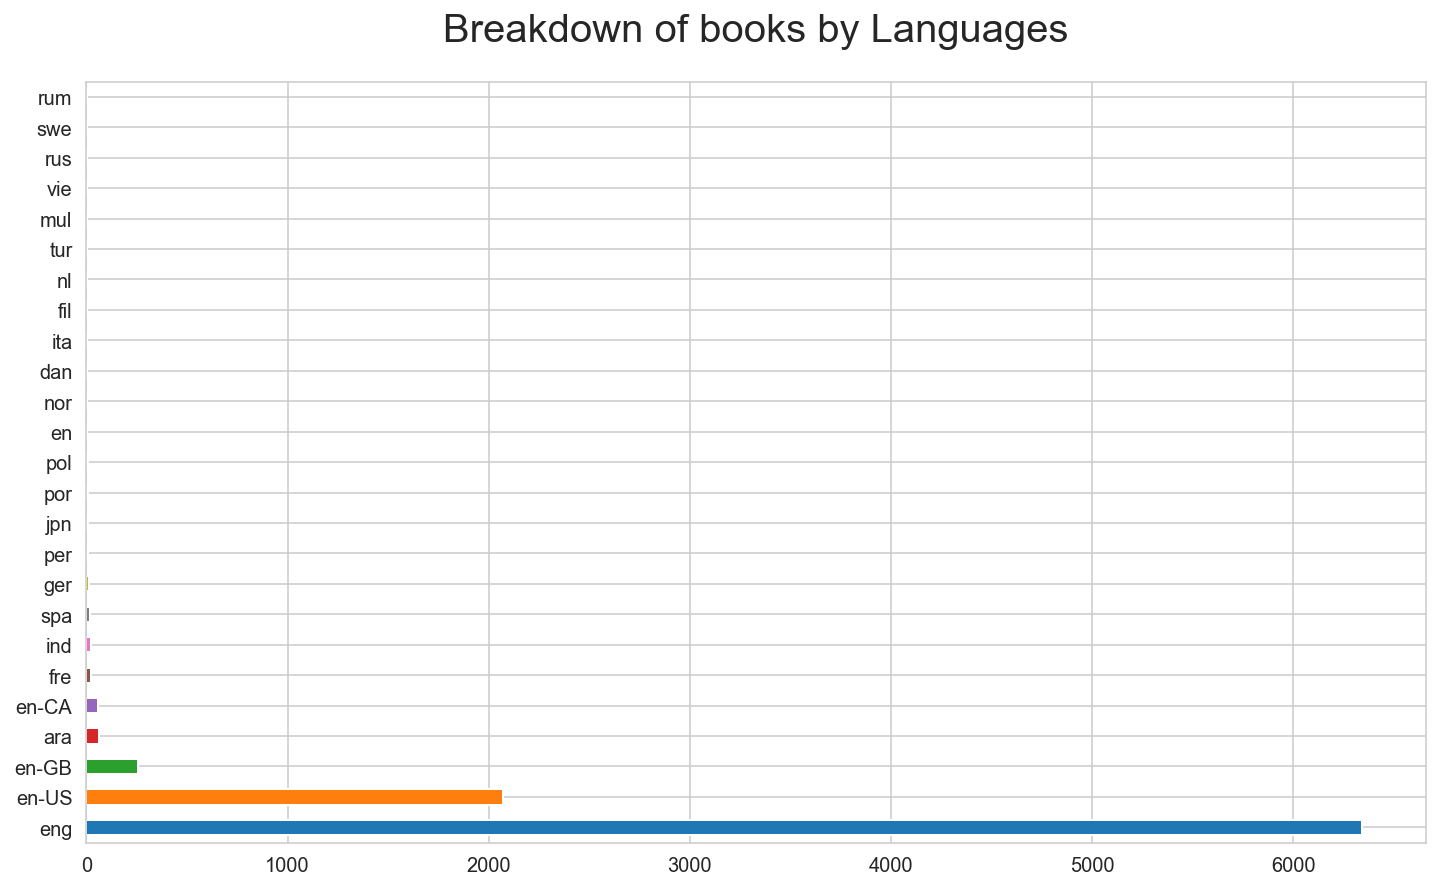

In [8]:
# Plotting horizontal bar graph of the various languages of the books
plt.figure(figsize=(12,7))
books['language_code'].value_counts().plot(kind='barh')
plt.title('Breakdown of books by Languages', fontsize=20, pad=20)
plt.show()

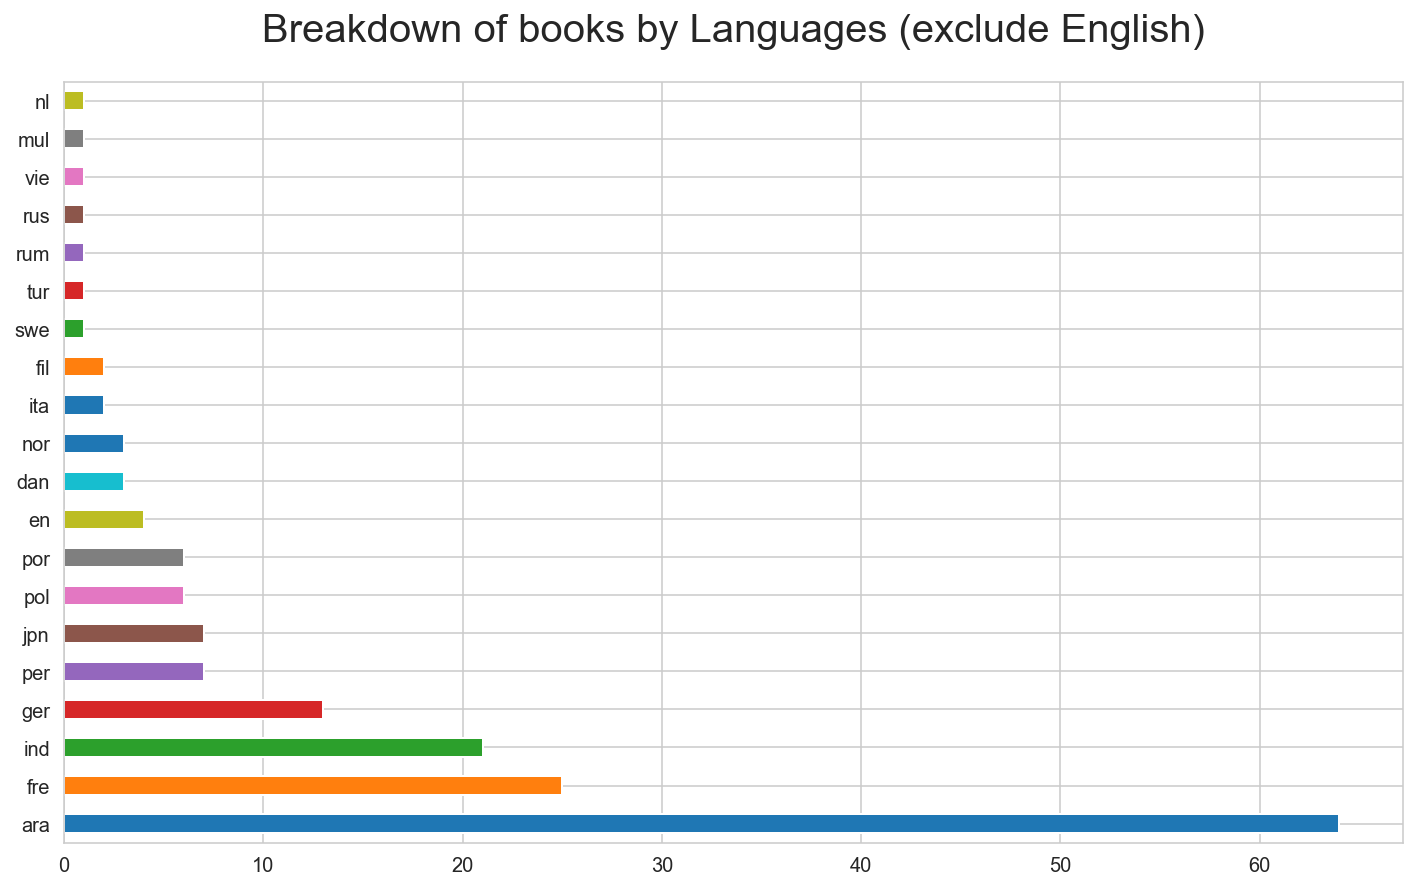

In [9]:
# Seems like English books constitute the majority of the books
# Plotting horizontal bar graph of the various languages of the books, excluding English
plt.figure(figsize=(12,7))
books.loc[books['language_code'].isin(['fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'])]['language_code'].value_counts().plot(kind='barh')
plt.title('Breakdown of books by Languages (exclude English)', fontsize=20, pad=20)
plt.show()

In [10]:
# Looking at the top 20 books based on average rating
books.sort_values(by='average_rating', ascending=False).head(20)[['authors','original_title','title','average_rating']]

,authors,original_title,title,average_rating
3627,Bill Watterson,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,4.82
3274,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77
861,Brandon Sanderson,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",4.77
8853,Francine Rivers,Mark of the Lion Trilogy,Mark of the Lion Trilogy,4.76
7946,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,ESV Study Bible,4.76
4482,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,It's a Magical World: A Calvin and Hobbes Coll...,4.75
6360,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,There's Treasure Everywhere: A Calvin and Hobb...,4.74
421,J.K. Rowling,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",4.74
3752,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",4.73
6919,Bill Watterson,The Indispensable Calvin and Hobbes: A Calvin ...,The Indispensable Calvin and Hobbes,4.73


## <span style="color:steelblue"> Books Data </span>

#### Missing Values
From the initial loading of the data, it can be seen that the columns "isbn", "isbn13", "original_publication_year", "original_title" and "language_code" have missing values. However, for the purposes of building a recommendation system, these are technically not very important for user-user collaborative filtering or item-item collaborative filtering. What is important for collaborative filtering is the user ratings of each books. We have tried to input the missing values for "original_publication_year" and "original_title" as we could potentially include it for content-based filtering.

#### Languages of books
Most of the books provided are written in English. However, after excluding English, the next most used language is Arabic, followed by French, Indian and German. Further exploratory analysis would be needed to see if the books written in languages other than English are also included, after having been translated.

We might have to consider the need to potentially filter out non-English books or to include an option to do so when building the recommender system

#### Top-rated books
The top 20 books based on average rating seem to be mainly from the Calvin & Hobbes series as well as Fantasy/Magic books such as Harry Potter. It is also interesting to note that the box sets, such as "The Complete Calvin and Hobbes" and "Complete Harry Potter Boxed Set", are all very highly rated. Perhaps completed series are just that good.

#### Top Authors
Based on the top 20 books from above, we can see that the authors of Calvin and Hobbes, Bill Watterson, and for Harry Potter, J.K. Rowling are the top authors from the dataset.

In [11]:
# Exploring the tags data
print(tags.shape)
print(tags.info())
print(tags.columns)
tags.head()

(34252, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB
None
Index(['tag_id', 'tag_name'], dtype='object')


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [12]:
tags['tag_name'].tail()

34247     Ｃhildrens
34248     Ｆａｖｏｒｉｔｅｓ
34249         Ｍａｎｇａ
34250        ＳＥＲＩＥＳ
34251    ｆａｖｏｕｒｉｔｅｓ
Name: tag_name, dtype: object

In [13]:
tags['tag_name'].sample(20)

28361                 spiritual-journey
18385                 literature-poetry
26881           science-versus-religion
26952                            scotus
25106                      read-fiction
17918                       leo-tolstoy
24800                      raamatuklubi
7643                            colegio
1875                              aiden
28125                       sonya-sones
13837          habiburrahman-el-shirazy
20865                 my-own-collection
9476                      did-not-enjoy
14154                    health-healing
29108                           swapped
27997                             snuff
10690                      entertainers
23759                 plays-screenplays
25839                              rgrc
519      19th-century-french-literature
Name: tag_name, dtype: object

## <span style="color:steelblue"> Creating content tags from the "tag_name" column </span>

It can be seen that the "tag_name" column is a free text input from the users. In order to apply content-based filtering for the recommender system we would need to clean up the tags to something more standardized. I have chosen to use the genre tags taken from the Good Reads website as a base.

In [14]:
# Cleaning up the tags to match genres in Good Reads website
# Excluding Chick Lit, Fiction, NonFiction from the genres
goodread_genres = ["Art", "Biography", "Business", "Children", "Christian", "Classic",
                   "Comic", "Contemporary", "Cookbook", "Crime", "Ebook", "Fantasy",
                   "Gay", "Lesbian", "Graphic Novel", "Historical Fiction", "History",
                   "Horror", "Humor", "Comedy", "Manga", "Memoir", "Music", "Mystery",
                   "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion",
                   "Romance", "Science", "Science Fiction", "Self Help", "Suspense",
                   "Spirituality", "Sport", "Thriller", "Travel", "Young Adult"]
goodread_tags = [x.lower() for x in goodread_genres]

# Iterating through the user inputted tags and creating new tags from the Good Reads genres
match_tag = []
for genre in tags['tag_name']:
    check = set([tag if ' ' + tag in ' ' + genre.replace('-', ' ').lower() else '0' for tag in goodread_tags])
    if len(check) > 1:
        match_tag.append(check - {'0'})
    else:
        match_tag.append('0')

tags['matched_tag'] = match_tag
tags['matched_tag'] = tags['matched_tag'].apply(lambda x: ' '.join(x))

# Dropping tags which do not coincide with any Good Reads genre
newtags = tags[tags['matched_tag'] != '0'].drop(columns='tag_name')

In [15]:
newtags.head()

,tag_id,matched_tag
31,31,history
39,39,poetry
42,42,psychology
70,70,graphic novel
81,81,ebook


In [16]:
# Exploring the booktags data
print(booktags.shape)
print(booktags.info())
print(booktags.columns)
print("Checking if which book id is used:")
print(booktags['goodreads_book_id'].unique())
booktags.head()

(999912, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB
None
Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')
Checking if which book id is used:
[       1        2        3 ... 32075671 32848471 33288638]


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [17]:
# Appending the Good Reads genres on the right of the booktags
booktags = pd.merge(booktags, newtags, how='right', on='tag_id')

# Aggregating the genres for each book, creating metadata for book content
bookcontent = pd.merge(books, booktags, how='inner', left_on='book_id', right_on='goodreads_book_id')
bookcontent = bookcontent.groupby('book_id')['matched_tag'].apply(' '.join).reset_index()

# Adding in Author names to complete the book contents metadata
bookcontent = pd.merge(bookcontent, books[['book_id', 'authors', 'id']], on='book_id', how='inner')
bookcontent['content'] = (pd.Series(bookcontent[['authors', 'matched_tag']].fillna('').values.tolist()).str.join(' '))

# Ensuring that the bookcontent DataFrame is ordered according to 'id'
bookcontent = bookcontent.sort_values('id')

print(bookcontent.shape)
bookcontent.head()

(10000, 5)


,book_id,matched_tag,authors,id,content
6193,2767052,fantasy young adult fantasy fantasy fantasy yo...,Suzanne Collins,1,Suzanne Collins fantasy young adult fantasy fa...
2,3,fantasy young adult children children children...,"J.K. Rowling, Mary GrandPré",2,"J.K. Rowling, Mary GrandPré fantasy young adul..."
2340,41865,fantasy young adult fantasy fantasy paranormal...,Stephenie Meyer,3,Stephenie Meyer fantasy young adult fantasy fa...
198,2657,young adult classic mystery ebook contemporary...,Harper Lee,4,Harper Lee young adult classic mystery ebook c...
350,4671,young adult classic romance ebook classic eboo...,F. Scott Fitzgerald,5,F. Scott Fitzgerald young adult classic romanc...


In [18]:
# Exploring the ratings data
print(ratings.shape)
print(ratings.info())
print(ratings.columns)
print("Checking if which book id is used:")
print(ratings['book_id'].unique())
ratings.head()

(981756, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
book_id    981756 non-null int64
user_id    981756 non-null int64
rating     981756 non-null int64
dtypes: int64(3)
memory usage: 22.5 MB
None
Index(['book_id', 'user_id', 'rating'], dtype='object')
Checking if which book id is used:
[    1     2     3 ...  9998  9999 10000]


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [19]:
# Subsetting the ratings data to allow ease of computation
# Subset books & users that have at least 100 ratings
book_count = ratings['book_id'].value_counts()
user_count = ratings['user_id'].value_counts()
df_rating = ratings[ratings['user_id'].isin(user_count[user_count >= 100].index)]
df_rating = df_rating[df_rating['book_id'].isin(book_count[book_count == 100].index)]
print(df_rating.shape)
df_rating.head()

(160279, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [20]:
# Creating user/item utility matrix
rating_matrix = pd.pivot_table(df_rating, index='user_id', columns='book_id', aggfunc='mean')
rating_matrix = rating_matrix.apply(lambda x: x - np.mean(x), axis=1).fillna(0)
print(rating_matrix.shape)
rating_matrix.head()

(1199, 7372)


rating                                                              \
book_id      1    2         3    4         5         6    7    8    9    10     
user_id                                                                         
35       0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
173      0.000000  0.0  0.000000  0.0  0.000000  1.637168  0.0  0.0  0.0  0.0   
178      0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
274      0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
314      1.418994  0.0 -0.581006  0.0  0.418994  1.418994  0.0  0.0  0.0  0.0   

                                                                               \
book_id 11        12   13   14   15   16        17   18   19        20   21     
user_id                                                                         
35       0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
173      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
178      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
274      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0   
314      0.0  0.418994  0.0  0.0  0.0  0.0  0.418994  0.0  0.0  0.418994  0.0   

                                                                               \
book_id      22   23   24   25   26   27   28        29        30        31     
user_id                                                                         
35       0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
173      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
178      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
274      0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
314     -0.581006  0.0  0.0  0.0  0.0  0.0  0.0 -0.581006  0.418994  1.418994   

                                                                          \
book_id 32   33        34        35        36   37   38        39   40     
user_id                                                                    
35       0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0   
173      0.0  0.0 -2.362832  0.000000  0.000000  0.0  0.0  0.000000  0.0   
178      0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0   
274      0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0   
314      0.0  0.0  0.000000  0.418994  0.418994  0.0  0.0 -0.581006  0.0   

                                                                               \
book_id      41   42   43        44   45        46        47   48        49     
user_id                                                                         
35       0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
173      0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
178      0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
274      0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
314      0.418994  0.0  0.0 -0.581006  0.0  0.418994  1.418994  0.0 -1.581006   

                                                                               \
book_id 50        51        52   53   54   55        56   57   58   59   60     
user_id                                                                         
35       0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
173      0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
178      0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
274      0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
314      0.0 -1.581006 -1.581006  0.0  0.0  0.0 -2.581006  0.0  0.0  0.0  0.0   

                                                                          \
book_id      61   62   63   64   65        66   67        68        69     
user_

In [21]:
# Looking at the top rated books
books.sort_values(by="average_rating", ascending=False).head(20)['title']

3627                       The Complete Calvin and Hobbes
3274    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
861        Words of Radiance (The Stormlight Archive, #2)
8853                             Mark of the Lion Trilogy
7946                                      ESV Study Bible
4482    It's a Magical World: A Calvin and Hobbes Coll...
6360    There's Treasure Everywhere: A Calvin and Hobb...
421              Harry Potter Boxset (Harry Potter, #1-7)
3752         Harry Potter Collection (Harry Potter, #1-6)
6919                  The Indispensable Calvin and Hobbes
6589    The Authoritative Calvin and Hobbes: A Calvin ...
9565    Attack of the Deranged Mutant Killer Monster S...
1307    A Court of Mist and Fury (A Court of Thorns an...
8977                          The Revenge of the Baby-Sat
9075      Preach My Gospel: A Guide To Missionary Service
7253    Homicidal Psycho Jungle Cat: A Calvin and Hobb...
5206    The Days Are Just Packed: A Calvin and Hobbes ...
5918          

In [22]:
# Function to create user-user cosine similarity matrix


def user_similarity(utility_matrix):
    '''
    Function to create a user-user cosine similarity matrix using pairwise_distances
    Returns a DataFrame of the user-user cosine similarity matrix
    '''
    temp_df = 1 - pairwise_distances(utility_matrix, utility_matrix, metric='cosine')

    return pd.DataFrame(temp_df, index=utility_matrix.index, columns=utility_matrix.index)


# Functions to provide recommendations based on user-user collaborative filtering and content-based filtering


def user_recommendation(ratings, k=2):
    '''
    Function to recommend books based on user's book ratings and nearest user cosine similarities
    Returns list of recommended books in rank order
    ratings: Dictionary of id in books and rating key:value pairs
    k: Number of nearest users to consider (default=2)
    '''

    # Creating a MultiIndex DataFrame from the user ratings
    new_user = pd.DataFrame.from_dict({'rating': ratings}).unstack().rename('111111')

    # Appending the user to the rating matrix before calculating cosine similarity
    temp_matrix = rating_matrix.append(new_user)
    temp_matrix = temp_matrix.apply(lambda x: x - np.mean(x), axis=1).fillna(0)
    mc_df = user_similarity(temp_matrix)

    # Identifying the k nearest users
    temp_df = rating_matrix[rating_matrix.index.isin(list(mc_df.loc[:, '111111'].sort_values(ascending=False)[1:k + 1].index.values))]

    # Creating recommendations based on user-user cosine similarity excluding user read books
    rec_book = temp_df.loc[:, (temp_df != 0).any(axis=0)].mean().sort_values(ascending=False).index.get_level_values('book_id')
    user_read = ratings.keys()
    rec_bookid = [i for i in rec_book if i not in user_read]

    return books.iloc[[books[books['id'] == recid].index.values[0] for recid in rec_bookid]]['title']


def content_recommendation(ratings, k=2):
    '''
    Function to recommend books based on user's book ratings and their contents
    Ratings are centred to the mean rating before books which are positively rated are used
    to get book recommendations based on the cosine similarity of the book content
    Returns list of recommended books in rank order
    ratings: Dictionary of book_id and rating key:value pairs
    k: Number of books' content to consider based on rank order
      (first element is based on highest ratings) (default=1)
    '''

    # Creating a MultiIndex DataFrame from the user ratings
    new_user = pd.DataFrame.from_dict({'rating': ratings}).unstack().rename('111111')

    if len(ratings) == 1 or k == 1:
        # Creating content utility matrix via TF-IDF vectorizer
        tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
        content_matrix = tfidf.fit_transform(bookcontent['content'])

        temp_df = linear_kernel(content_matrix, content_matrix)
        k, v = next(iter(ratings.items()))
        idx = pd.Series(books.index, index=books['id'])[k]
        book_index = sorted(list(enumerate(temp_df[idx])), key=lambda x: x[1], reverse=True)[1:21]
        return books.iloc[[i[0] for i in book_index]]['title']

    else:
        # Appending the user to the rating matrix
        temp_matrix = rating_matrix.append(new_user)
        temp_matrix = temp_matrix.apply(lambda x: x - np.mean(x), axis=1).fillna(0)

        book_list = []
        for i, n in enumerate(temp_matrix.loc['111111'].sort_values(ascending=False)):
            if n > 0:
                book_list.append(temp_matrix.loc['111111'].sort_values(ascending=False).index.get_level_values('book_id')[i])

        # Creating the book content based on the books selected for consideration
        new_content = ', '.join(bookcontent[bookcontent['id'].isin(book_list[:k])]['content'].values)

        # Appending content to the bookcontent DataFrame
        temp_content = bookcontent.append({
            'book_id': 111111,
            'matched_tag': 'User selected',
            'authors': 'User selected',
            'id': 111111,
            'content': new_content
        }, ignore_index=True)

        # Creating content utility matrix via TF-IDF vectorizer
        tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
        content_matrix = tfidf.fit_transform(temp_content['content'])

        temp_df = linear_kernel(content_matrix, content_matrix)

        book_index = sorted(list(enumerate(temp_df[10000])), key=lambda x: x[1], reverse=True)[1:]
        rec_book = books['id'].iloc[[i[0] for i in book_index]]
        user_read = ratings.keys()
        rec_bookid = [i for i in rec_book if i not in user_read]

        return books.iloc[[books[books['id'] == recid].index.values[0] for recid in rec_bookid]]['title']

In [23]:
# Testing out the code
user_recommendation({70: 5, 192: 4, 7095: 4, 143: 1.5, 249: 1.5, 1546: 4, 562: 4, 970: 4})

195                                            Fight Club
759                   Ender's Shadow (Ender's Shadow, #1)
491               Speaker for the Dead (Ender's Saga, #2)
214                                      Ready Player One
12                                                   1984
1298                           Still Life with Woodpecker
1       Harry Potter and the Sorcerer's Stone (Harry P...
583                      The Magicians (The Magicians #1)
1592          Magician: Apprentice (The Riftwar Saga, #1)
24      Harry Potter and the Deathly Hallows (Harry Po...
421              Harry Potter Boxset (Harry Potter, #1-7)
2312              The Magician's Land (The Magicians, #3)
428      The Color of Magic (Discworld, #1; Rincewind #1)
1340                          Golden Son (Red Rising, #2)
473                                      The God Delusion
1681                The Magician King (The Magicians, #2)
44                                             Life of Pi
25            

In [24]:
content_recommendation({70: 5, 192: 4, 7095: 4, 143: 1.5, 249: 1.5, 1546: 4, 562: 4, 970: 4})

9642                    The Gate Thief (Mither Mages, #2)
2807    The Crystal Shard (Forgotten Realms: Icewind D...
858                  The Way of Shadows (Night Angel, #1)
2415    Exile (Forgotten Realms: The Dark Elf Trilogy,...
3499    Streams of Silver (Forgotten Realms: Icewind D...
9695                   Perfect Shadow (Night Angel, #0.5)
1411                      Shadow's Edge (Night Angel, #2)
2653    Sojourn (Forgotten Realms: The Dark Elf Trilog...
1692                 Pawn of Prophecy (The Belgariad, #1)
7746    The Two Swords (Forgotten Realms: Hunter's Bla...
9132    Servant of the Shard (Forgotten Realms: Paths ...
8910                  The Blood Mirror (Lightbringer, #4)
5287                     The Lost Gate (Mither Mages, #1)
4181    To Green Angel Tower (Memory, Sorrow, and Thor...
5866       The Sword of Shannara Trilogy (Shannara, #1-3)
3181    The Wishsong of Shannara (The Original Shannar...
4256    The Legacy (Forgotten Realms: Legacy of the Dr...
4913    Starle